GPU başarıyla algılandı ve kullanılacak.
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.3025 - loss: 1.9958 - val_accuracy: 0.3420 - val_loss: 1.9937
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.5430 - loss: 1.2804 - val_accuracy: 0.5055 - val_loss: 1.5114
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.6223 - loss: 1.0753 - val_accuracy: 0.5431 - val_loss: 1.2870
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6659 - loss: 0.9662 - val_accuracy: 0.6599 - val_loss: 0.9909
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/step - accuracy: 0.6945 - loss: 0.8849 - val_accuracy: 0.5882 - val_loss: 1.2227
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.7236 - loss: 0.8165 - val_accuracy: 0.5928 - val_loss: 1.2573
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - accuracy: 0.7460 - loss: 0.7564 - val_accuracy: 0.6071 - val_loss: 1.1514
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 92ms/

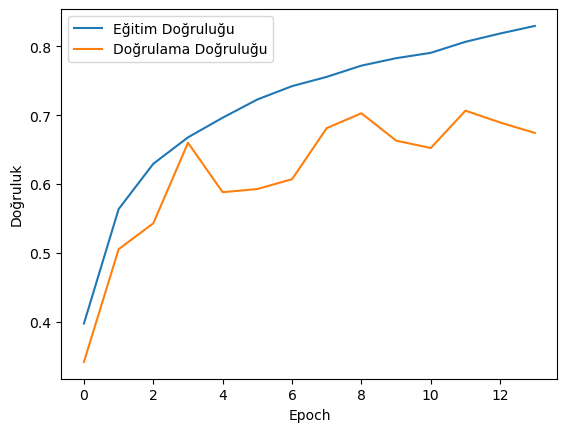

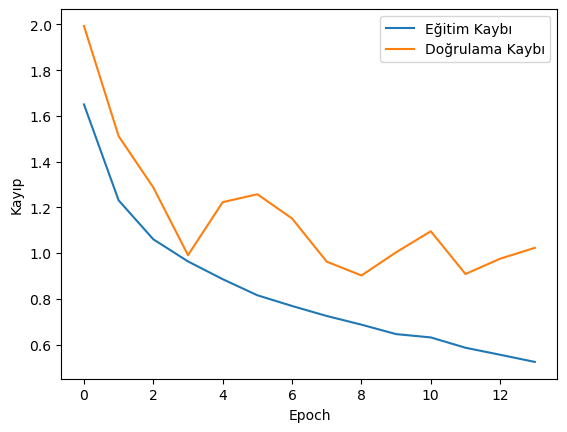

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# GPU kullanılabilir mi kontrol edelim
if tf.config.list_physical_devices('GPU'):
    print("GPU başarıyla algılandı ve kullanılacak.")
else:
    print("GPU algılanamadı, CPU kullanılacak.")

# CIFAR-10 veri setini yükle ve hazırla
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizasyon (0-1 aralığına dönüştürme)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri one-hot encoding formatına dönüştür
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# AlexNet benzeri model
model = Sequential([
    # 1. Evrişim Katmanı
    Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 2. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 4. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', padding='same'),

    # 5. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tam Bağlantılı Katmanlar
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.6),
    Dense(4096, activation='relu'),
    Dropout(0.6),
    Dense(10, activation='softmax')  # CIFAR-10 için 10 sınıf
])

# Modeli derle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Modeli eğit
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

# Model performansını test et
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Kayıp: {test_loss:.4f}, Test Doğruluk: {test_accuracy:.4f}")

# Eğitim ve doğrulama grafikleri
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# GPU kullanılabilir mi kontrol edelim
if tf.config.list_physical_devices('GPU'):
    print("GPU başarıyla algılandı ve kullanılacak.")
else:
    print("GPU algılanamadı, CPU kullanılacak.")

# CIFAR-10 veri setini yükle ve hazırla
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizasyon (0-1 aralığına dönüştürme)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri one-hot encoding formatına dönüştür
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# AlexNet benzeri model
model = Sequential([
    # 1. Evrişim Katmanı
    Conv2D(96, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 2. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),

    # 4. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),

    # 5. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tam Bağlantılı Katmanlar
    Flatten(),
    Dense(4096, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(4096, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.6),
    Dense(10, activation='softmax')  # CIFAR-10 için 10 sınıf
])

# Modeli derle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Modeli eğit
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Veri artırma ile eğitim
    validation_data=(x_test, y_test),
    epochs=100,  # Maksimum epoch
    callbacks=[early_stopping]
)

# Model performansını test et
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Kayıp: {test_loss:.4f}, Test Doğruluk: {test_accuracy:.4f}")

# Eğitim ve doğrulama grafikleri
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


GPU başarıyla algılandı ve kullanılacak.
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 89ms/step - accuracy: 0.3395 - loss: 42.7283 - val_accuracy: 0.5258 - val_loss: 5.1706
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.5605 - loss: 3.9829 - val_accuracy: 0.6345 - val_loss: 2.2734
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.6267 - loss: 2.1514 - val_accuracy: 0.6130 - val_loss: 1.9272
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6589 - loss: 1.7363 - val_accuracy: 0.6391 - val_loss: 1.6777
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6851 - loss: 1.5371 - val_accuracy: 0.6690 - val_loss: 1.5293
Epoch 6/100
  1/782 ━━━━━━━━━━━━━━━━━━━━ 1:12 93ms/step - accuracy: 0.7344 - loss: 1.3104

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


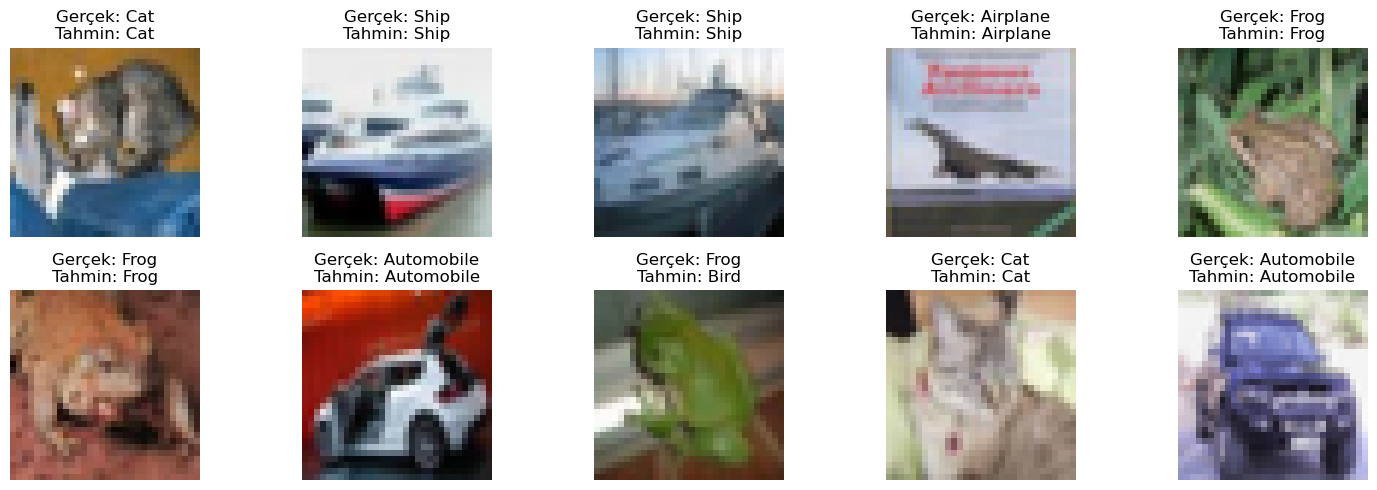

In [4]:
import numpy as np

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


# Test setinde birkaç tahmin
predictions = model.predict(x_test[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test[:10], axis=1)

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Gerçek: {class_names[true_classes[i]]}\nTahmin: {class_names[predicted_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

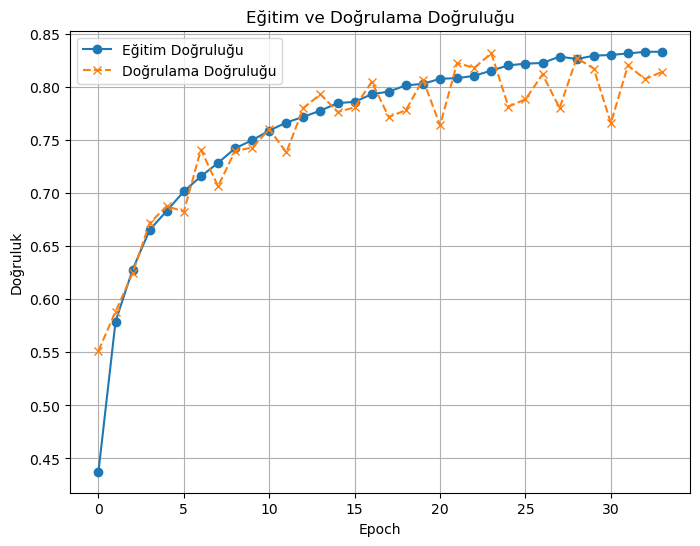

In [5]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğu grafikleri
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu', linestyle='--', marker='x')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GPU kullanılabilir mi kontrol edelim
if tf.config.list_physical_devices('GPU'):
    print("GPU başarıyla algılandı ve kullanılacak.")
else:
    print("GPU algılanamadı, CPU kullanılacak.")

# CIFAR-10 veri setini yükle ve hazırla
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizasyon (0-1 aralığına dönüştürme)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketleri one-hot encoding formatına dönüştür
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Veri artırma (Data Augmentation)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# İyileştirilmiş AlexNet benzeri model
model = Sequential([
    # 1. Evrişim Katmanı
    Conv2D(96, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 2. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # 3. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),

    # 4. Evrişim Katmanı
    Conv2D(384, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),

    # 5. Evrişim Katmanı
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tam Bağlantılı Katmanlar
    Flatten(),
    Dense(4096, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4096, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 için 10 sınıf
])

# Modeli derle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

# Modeli eğit
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Veri artırma ile eğitim
    validation_data=(x_test, y_test),
    epochs=50,  # Maksimum epoch
    callbacks=[early_stopping]
)

# Model performansını test et
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Kayıp: {test_loss:.4f}, Test Doğruluk: {test_accuracy:.4f}")

# Eğitim ve doğrulama grafikleri
import matplotlib.pyplot as plt

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Kayıp grafiği
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


GPU başarıyla algılandı ve kullanılacak.
Epoch 1/50


/opt/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 89ms/step - accuracy: 0.3666 - loss: 41.0273 - val_accuracy: 0.5530 - val_loss: 4.7144
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.5660 - loss: 3.7446 - val_accuracy: 0.5867 - val_loss: 2.4097
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6236 - loss: 2.1251 - val_accuracy: 0.6704 - val_loss: 1.7323
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.6623 - loss: 1.7122 - val_accuracy: 0.6773 - val_loss: 1.6019
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 199ms/step - accuracy: 0.6896 - loss: 1.5064 - val_accuracy: 0.6986 - val_loss: 1.4455
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.7051 - loss: 1.3896 - val_accuracy: 0.7169 - val_loss: 1.3237
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 365s 467ms/step - accuracy: 0.7213 - loss: 1.3097 - val_accuracy: 0.6952 - val_loss: 1.3823
Epoch 8/50
360/782 ━━━━━━━━━━━━━━━━━━━━ 4:50 688ms/step - accuracy: 0.7346 - loss: 1.2387

KeyboardInterrupt: 